<a href="https://colab.research.google.com/github/tenochca/DataScienceProject/blob/main/finalproject_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_diabetes = pd.read_csv('/content/drive/MyDrive/DSC 343/diabetes_prediction_dataset.csv')
df_diabetes.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
#drop duplicates
df_diabetes.drop_duplicates(inplace = True)
df_diabetes.shape

(96146, 9)

In [ ]:
#moving diabetes to the first columnn
col_to_move = df_diabetes.pop('diabetes')
df_diabetes.insert(0, 'diabetes', col_to_move)
df_diabetes.head()

,diabetes,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,Female,80.0,0,1,never,25.19,6.6,140
1,0,Female,54.0,0,0,No Info,27.32,6.6,80
2,0,Male,28.0,0,0,never,27.32,5.7,158
3,0,Female,36.0,0,0,current,23.45,5.0,155
4,0,Male,76.0,1,1,current,20.14,4.8,155


In [ ]:
#putting the bmi column into bins
bmi_bins = pd.qcut(df_diabetes.bmi, 3)
bmi_bins.head(10)

0    (10.009, 25.3]
1     (25.3, 27.73]
2     (25.3, 27.73]
3    (10.009, 25.3]
4    (10.009, 25.3]
5     (25.3, 27.73]
6    (10.009, 25.3]
7    (10.009, 25.3]
8    (27.73, 95.69]
9     (25.3, 27.73]
Name: bmi, dtype: category
Categories (3, interval[float64, right]): [(10.009, 25.3] < (25.3, 27.73] < (27.73, 95.69]]

In [ ]:
#specify quantiles for discretization, the reange for a nomral bmi is low compared to the range of the data
bmi_bins = pd.qcut(df_diabetes.bmi, [0, 0.2, 0.3, 1], labels=["low", "norm", "high"])
bmi_bins.head(10)

0    high
1    high
2    high
3    norm
4     low
5    high
6     low
7    norm
8    high
9    high
Name: bmi, dtype: category
Categories (3, object): ['low' < 'norm' < 'high']

In [ ]:
#adding new column to dataframe
df_diabetes["bmi-bins"] = bmi_bins
df_diabetes.head()

,diabetes,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,bmi-bins
0,0,Female,80.0,0,1,never,25.19,6.6,140,high
1,0,Female,54.0,0,0,No Info,27.32,6.6,80,high
2,0,Male,28.0,0,0,never,27.32,5.7,158,high
3,0,Female,36.0,0,0,current,23.45,5.0,155,norm
4,0,Male,76.0,1,1,current,20.14,4.8,155,low


In [ ]:
#dropping the old bmi column
df_diabetes.drop(columns=['bmi'], inplace=True)
df_diabetes.head()

,diabetes,gender,age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,bmi-bins
0,0,Female,80.0,0,1,never,6.6,140,high
1,0,Female,54.0,0,0,No Info,6.6,80,high
2,0,Male,28.0,0,0,never,5.7,158,high
3,0,Female,36.0,0,0,current,5.0,155,norm
4,0,Male,76.0,1,1,current,4.8,155,low


In [ ]:
#getting the dummies
df_diabetes = pd.get_dummies(df_diabetes)
df_diabetes.head(10)

,diabetes,age,hypertension,heart_disease,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,bmi-bins_low,bmi-bins_norm,bmi-bins_high
0,0,80.0,0,1,6.6,140,1,0,0,0,0,0,0,1,0,0,0,1
1,0,54.0,0,0,6.6,80,1,0,0,1,0,0,0,0,0,0,0,1
2,0,28.0,0,0,5.7,158,0,1,0,0,0,0,0,1,0,0,0,1
3,0,36.0,0,0,5.0,155,1,0,0,0,1,0,0,0,0,0,1,0
4,0,76.0,1,1,4.8,155,0,1,0,0,1,0,0,0,0,1,0,0
5,0,20.0,0,0,6.6,85,1,0,0,0,0,0,0,1,0,0,0,1
6,1,44.0,0,0,6.5,200,1,0,0,0,0,0,0,1,0,1,0,0
7,0,79.0,0,0,5.7,85,1,0,0,1,0,0,0,0,0,0,1,0
8,0,42.0,0,0,4.8,145,0,1,0,0,0,0,0,1,0,0,0,1
9,0,32.0,0,0,5.0,100,1,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
#dropping smoking_history_ever---typo
df_diabetes.drop(columns=['smoking_history_ever'], inplace=True)

In [ ]:
diabetes_names = df_diabetes.columns.values
diabetes_names

array(['diabetes', 'age', 'hypertension', 'heart_disease', 'HbA1c_level',
       'blood_glucose_level', 'gender_Female', 'gender_Male',
       'gender_Other', 'smoking_history_No Info',
       'smoking_history_current', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current',
       'bmi-bins_low', 'bmi-bins_norm', 'bmi-bins_high'], dtype=object)

In [ ]:
#separating the target from the rest of the variables-kmeans will only be run on x
y = df_diabetes['diabetes']
x = df_diabetes[diabetes_names[1:]]
x.head()

,age,hypertension,heart_disease,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_former,smoking_history_never,smoking_history_not current,bmi-bins_low,bmi-bins_norm,bmi-bins_high
0,80.0,0,1,6.6,140,1,0,0,0,0,0,1,0,0,0,1
1,54.0,0,0,6.6,80,1,0,0,1,0,0,0,0,0,0,1
2,28.0,0,0,5.7,158,0,1,0,0,0,0,1,0,0,0,1
3,36.0,0,0,5.0,155,1,0,0,0,1,0,0,0,0,1,0
4,76.0,1,1,4.8,155,0,1,0,0,1,0,0,0,1,0,0


In [ ]:
#splitting training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=801)

In [ ]:
#fitting scaler to the training data using z score
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
#normalizing testing and training
x_train_zscore = scaler.transform(x_train)
x_test_zscore = scaler.transform(x_test)

In [ ]:
print(x_test_zscore)

[[ 0.23149363 -0.29008362 -0.20654345 ... -0.50070684 -0.33245144
   0.65461719]
 [-0.34754314 -0.29008362 -0.20654345 ... -0.50070684 -0.33245144
   0.65461719]
 [-0.79295605 -0.29008362 -0.20654345 ... -0.50070684 -0.33245144
   0.65461719]
 ...
 [-1.81027912 -0.29008362 -0.20654345 ...  1.99717663 -0.33245144
  -1.52761035]
 [ 0.67690654 -0.29008362 -0.20654345 ... -0.50070684 -0.33245144
   0.65461719]
 [-1.50561669 -0.29008362 -0.20654345 ...  1.99717663 -0.33245144
  -1.52761035]]


In [ ]:
#converting the target variables into numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# MODEL TESTING

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=801)
y_kmeans2 = kmeans2.fit_predict(x_train)
print('Clusering assignments:\n', y_kmeans2[0:10])
print('Cluster centroids:\n', kmeans2.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusering assignments:
 [0 0 1 1 0 1 1 1 1 0]
Cluster centroids:
 [[4.27056292e+01 8.59236388e-02 4.59918431e-02 5.59742851e+00
  1.65610982e+02 5.80382036e-01 4.19410585e-01 2.07378050e-04
  3.30053688e-01 9.70298855e-02 1.00762690e-01 3.63349386e-01
  6.69600682e-02 1.92354663e-01 9.66381714e-02 7.11007166e-01]
 [4.06335973e+01 6.68615926e-02 3.43407823e-02 5.44484888e+00
  1.02770236e+02 5.89342722e-01 4.10508100e-01 1.49178029e-04
  3.54805024e-01 9.37733091e-02 9.19533371e-02 3.52776203e-01
  6.62052093e-02 2.10937733e-01 1.03261032e-01 6.85801235e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

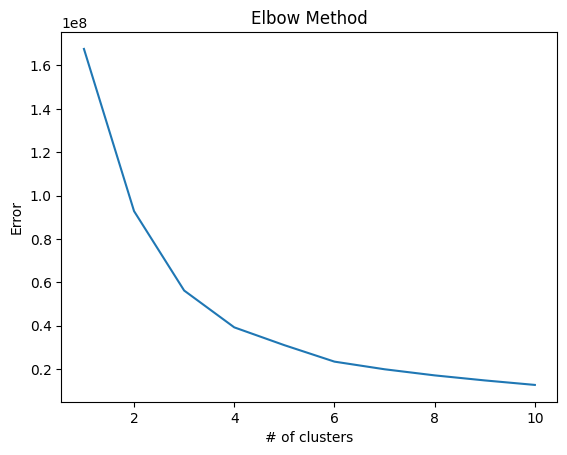

In [ ]:
Error = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i).fit(x_train)
  kmeans.fit(x_train)
  Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,11), Error)
plt.title('Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('Error')
plt.show()

# **MODEL VALIDATION**
to validate the model the training and testing split will be used to see if we can replicate the results of the model on new data.

In [ ]:
kmeans4 = KMeans(n_clusters=4, random_state=801)
y_kmeans4 = kmeans4.fit_predict(x_test)
print('Clusering assignments:\n', y_kmeans4[0:10])
print('Cluster centroids:\n', kmeans4.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusering assignments:
 [2 1 1 2 2 1 2 3 0 2]
Cluster centroids:
 [[ 5.97095935e+01  1.38536585e-01  7.51219512e-02  5.61731707e+00
   1.46691382e+02  5.92032520e-01  4.07642276e-01  3.25203252e-04
   2.53495935e-01  1.05365854e-01  1.47154472e-01  3.63252033e-01
   7.82113821e-02  7.33333333e-02  9.77235772e-02  8.28943089e-01]
 [ 2.13554202e+01  1.09389243e-02  1.82315406e-04  5.41699180e+00
   1.46367730e+02  5.84685506e-01  4.14949863e-01  3.64630811e-04
   4.56335460e-01  8.60528715e-02  3.79216044e-02  3.39653601e-01
   5.15952598e-02  3.41294439e-01  1.06836828e-01  5.51868733e-01]
 [ 3.97098294e+01  6.07228032e-02  3.11869382e-02  5.40810860e+00
   8.87598606e+01  5.82095028e-01  4.17904972e-01 -1.35525272e-19
   3.63786461e-01  9.11759310e-02  8.60392589e-02  3.54063475e-01
   6.20069712e-02  2.20326546e-01  1.05668685e-01  6.74004770e-01]
 [ 4.76924440e+01  1.15671642e-01  6.66977612e-02  5.96180037e+00
   2.18479478e+02  5.59235075e-01  4.40764925e-01 -4.63496429e-18
   2.91

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

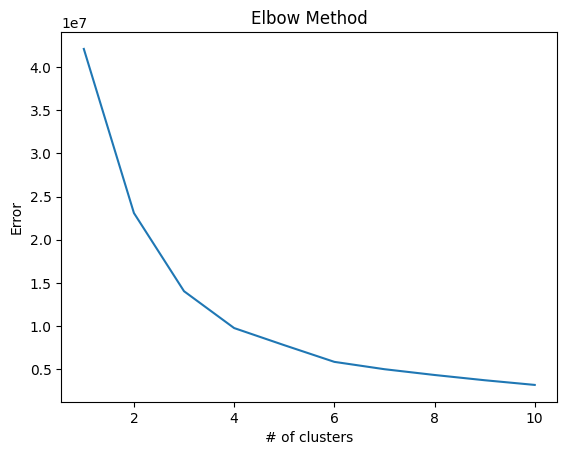

In [ ]:
Error = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i).fit(x_test)
  kmeans.fit(x_test)
  Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,11), Error)
plt.title('Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('Error')
plt.show()